In [1]:
import cirq
from cirq.contrib.svg import SVGCircuit
import qsimcirq
import stim
import stimcirq
import numpy as np
import matplotlib.pyplot as plt
from qsim_utils import *
from stabilizer_sim import * 

# Encoding

In [2]:
num_qubits = [7,3,3]
bin2dec = 2**np.arange(6)[::-1]
cirq_simulator = cirq.Simulator()
p_depol,p_readout = 1e-3,1e-3

noise_model,readout_noise = None,None
# noise_model = cirq.NoiseModel.from_noise_model_like(cirq.depolarize(p=p_depol))
# readout_noise = cirq.BitFlipChannel(p=p_readout)

qubits = init_qubits(num_qubits)

# order: X1245,X1347,Z4567 then Z
stabilizer_gateseqs = [[[7],(7,10),(7,0),(10,1),(7,3),(10,4),(7,10),[7],['m',7],['m',10]],
                       [[8],(8,11),(11,2),(8,0),(8,3), (8,6),(8,11),[8],['m',8],['m',11]],
                       [[9],(9,12),(9,3),(12,4),(9,6),(12,5),(9,12),[9],['m',9],['m',12]],
                       [[10],(10,7),(0,7),(1,10),(3,7),(4,10),(10,7),[10],['m',7],['m',10]],
                       [[11],(11,8),(2,11),(0,8),(3,8), (6,8),(11,8),[11],['m',8],['m',11]],
                       [[12],(12,9),(3,9),(4,12),(6,9),(5,12),(12,9),[12],['m',9],['m',12]]]

labels = ['X1','X2','X3','Z1','Z2','Z3']
stabilizer_circuits = {l:create_cirq(qubits,
                                     gate_seq,
                                     noise_model,
                                     readout_noise,
                                     [f'synd_{l}',f'flag_{l}']) for gate_seq,l in zip(stabilizer_gateseqs,labels)}

    
steane_code = ['XXIXXII','XIXXIIX','IIIXXXX','ZZIZZII','ZIZZIIZ','IIIZZZZ']

# stab_Z1 = create_cirq(qubits,Z1245,noise_model,readout_noise,['synd_Z1','flag_Z1'])
# stab_Z2 = create_cirq(qubits,Z1347,noise_model,readout_noise,['synd_Z2','flag_Z2'])
# stab_Z3 = create_cirq(qubits,Z4567,noise_model,readout_noise,['synd_Z3','flag_Z3'])
# 
# stabs = [stab_Z1,stab_Z2,stab_Z3,stab_X1,stab_X2,stab_X3]
# qec_code = ['ZZIZZII','ZIZZIIZ','IIIZZZZ','XXIXXII','XIXXIIX','IIIXXXX']
lut = lut_decoder(steane_code)
# print(stab_X1)
# print(stab_X3)

In [23]:
circuit = cirq.Circuit()
for c in list(stabilizer_circuits.values())[:3]:
    circuit += c
scircuit = stimcirq.cirq_circuit_to_stim_circuit(circuit)

num_rep = int(1e2)

In [17]:
cirq_simulator.simulate(circuit)

measurements: flag_X1=0 flag_X2=0 flag_X3=0 synd_X1=0 synd_X2=0 synd_X3=0
output vector: 0.354|0000000000000⟩ + 0.354|0001111000000⟩ + 0.354|0110101000000⟩ + 0.354|0111010000000⟩ + 0.354|1010110000000⟩ + 0.354|1011001000000⟩ + 0.354|1100011000000⟩ + 0.354|1101100000000⟩

In [25]:
%%timeit
cirq_simulator.run(circuit,repetitions=num_rep)

230 ms ± 1.42 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [26]:
sampler = scircuit.compile_sampler()

In [27]:
%%timeit
sampler.sample(shots=num_rep)

24.9 µs ± 67.4 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


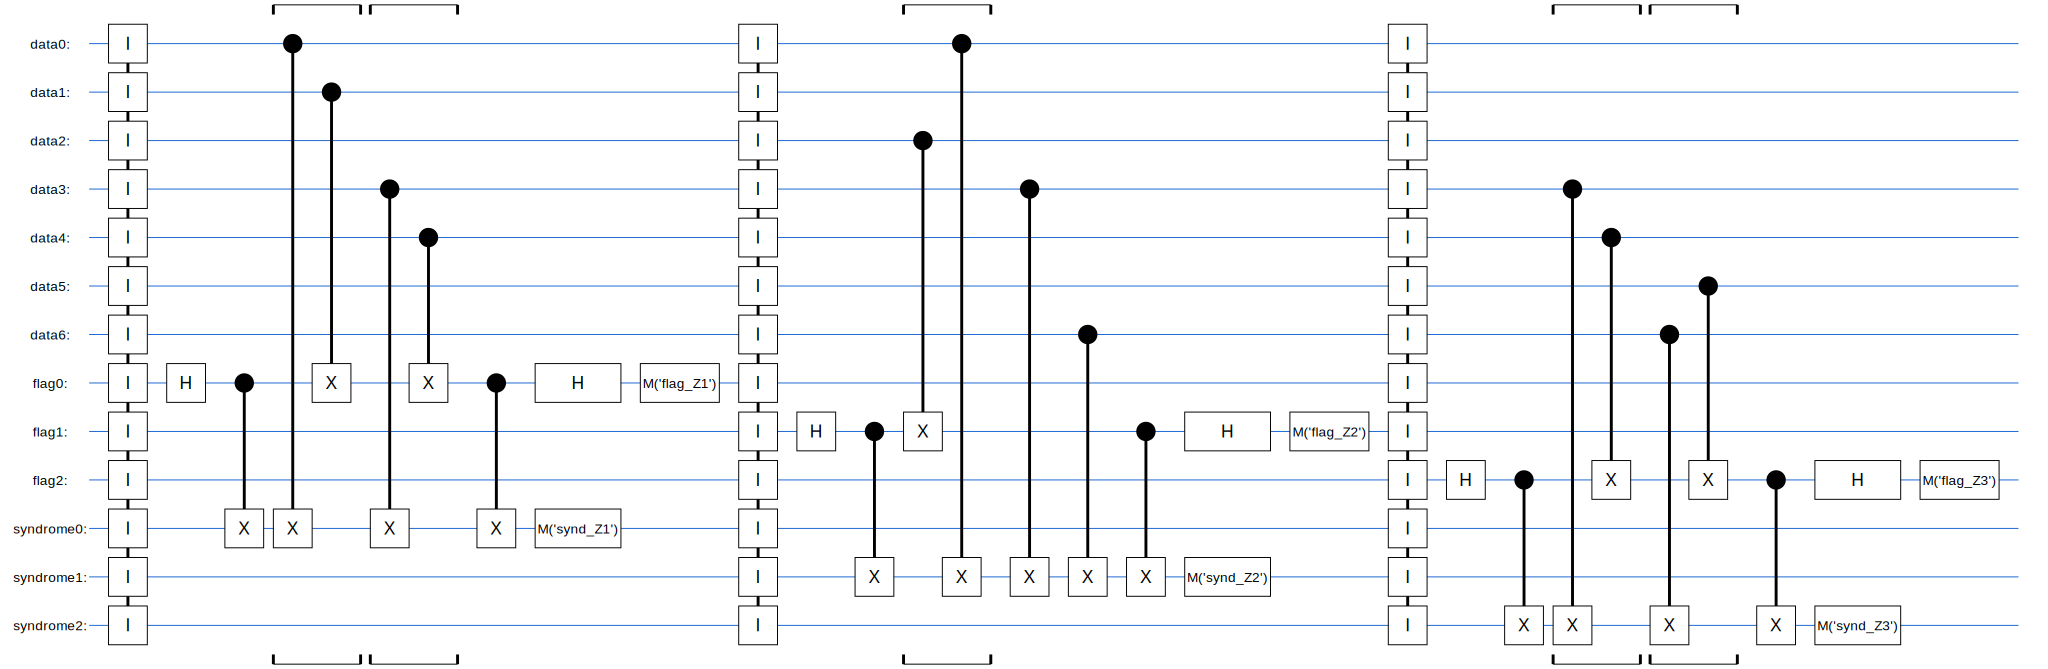

In [5]:
SVGCircuit(circuit)